<a href="https://colab.research.google.com/github/Sabry-Ahmed/Python_M1/blob/main/FinalCodeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aujourd'hui, les paris sportifs font partie intégrante de la vie de nombreux passionnés de sport. La Coupe du monde de football est l'événement sportif le plus regardé. Les parieurs seraient prêts à tout donner pour pouvoir connaître le résultat d'un match avant sa fin. Mais alors est-ce possible ?

In [4]:
from google.colab import drive
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/M1/international_matches.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Les colonnes du dataset

In [5]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

On crée une liste avec les 32 équipes participant à la Coupe du monde

In [6]:
world_cup_teams = [
    'Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 
    'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 
    'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 
    'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica'
]

On crée une nouvelle dataframe avec uniquement les 32 équipes et 
après le dernier match de la coupe du monde

In [7]:
data_wc = data[(data.home_team.isin(world_cup_teams)) | (data.away_team.isin(world_cup_teams))].copy()
data_wc = data_wc[data.date >= '2018-07-15']
data_wc.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1236, 25)

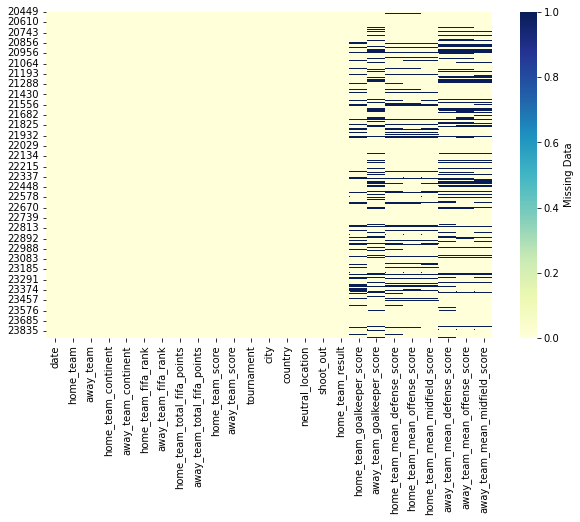

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data_wc.isnull(),
    cmap="YlGnBu",
    cbar_kws={'label': 'Missing Data'}
)

In [9]:
(data_wc.isnull().mean() * 100).astype(str) + '%'

date                                            0.0%
home_team                                       0.0%
away_team                                       0.0%
home_team_continent                             0.0%
away_team_continent                             0.0%
home_team_fifa_rank                             0.0%
away_team_fifa_rank                             0.0%
home_team_total_fifa_points                     0.0%
away_team_total_fifa_points                     0.0%
home_team_score                                 0.0%
away_team_score                                 0.0%
tournament                                      0.0%
city                                            0.0%
country                                         0.0%
neutral_location                                0.0%
shoot_out                                       0.0%
home_team_result                                0.0%
home_team_goalkeeper_score       15.291262135922329%
away_team_goalkeeper_score        19.579288025

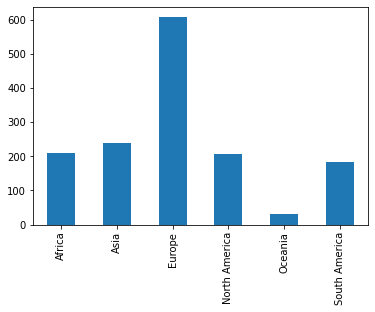

In [10]:
# count number of items in one column : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
home_cont = data_wc[data_wc.home_team.isin(world_cup_teams)].home_team_continent.value_counts() 
away_cont = data_wc[data_wc.away_team.isin(world_cup_teams)].away_team_continent.value_counts()
home_cont.add(away_cont).plot(kind='bar');

In [27]:
fifa_rank = data_wc[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home,away])
fifa_rank= fifa_rank[fifa_rank.team.isin(world_cup_teams)]

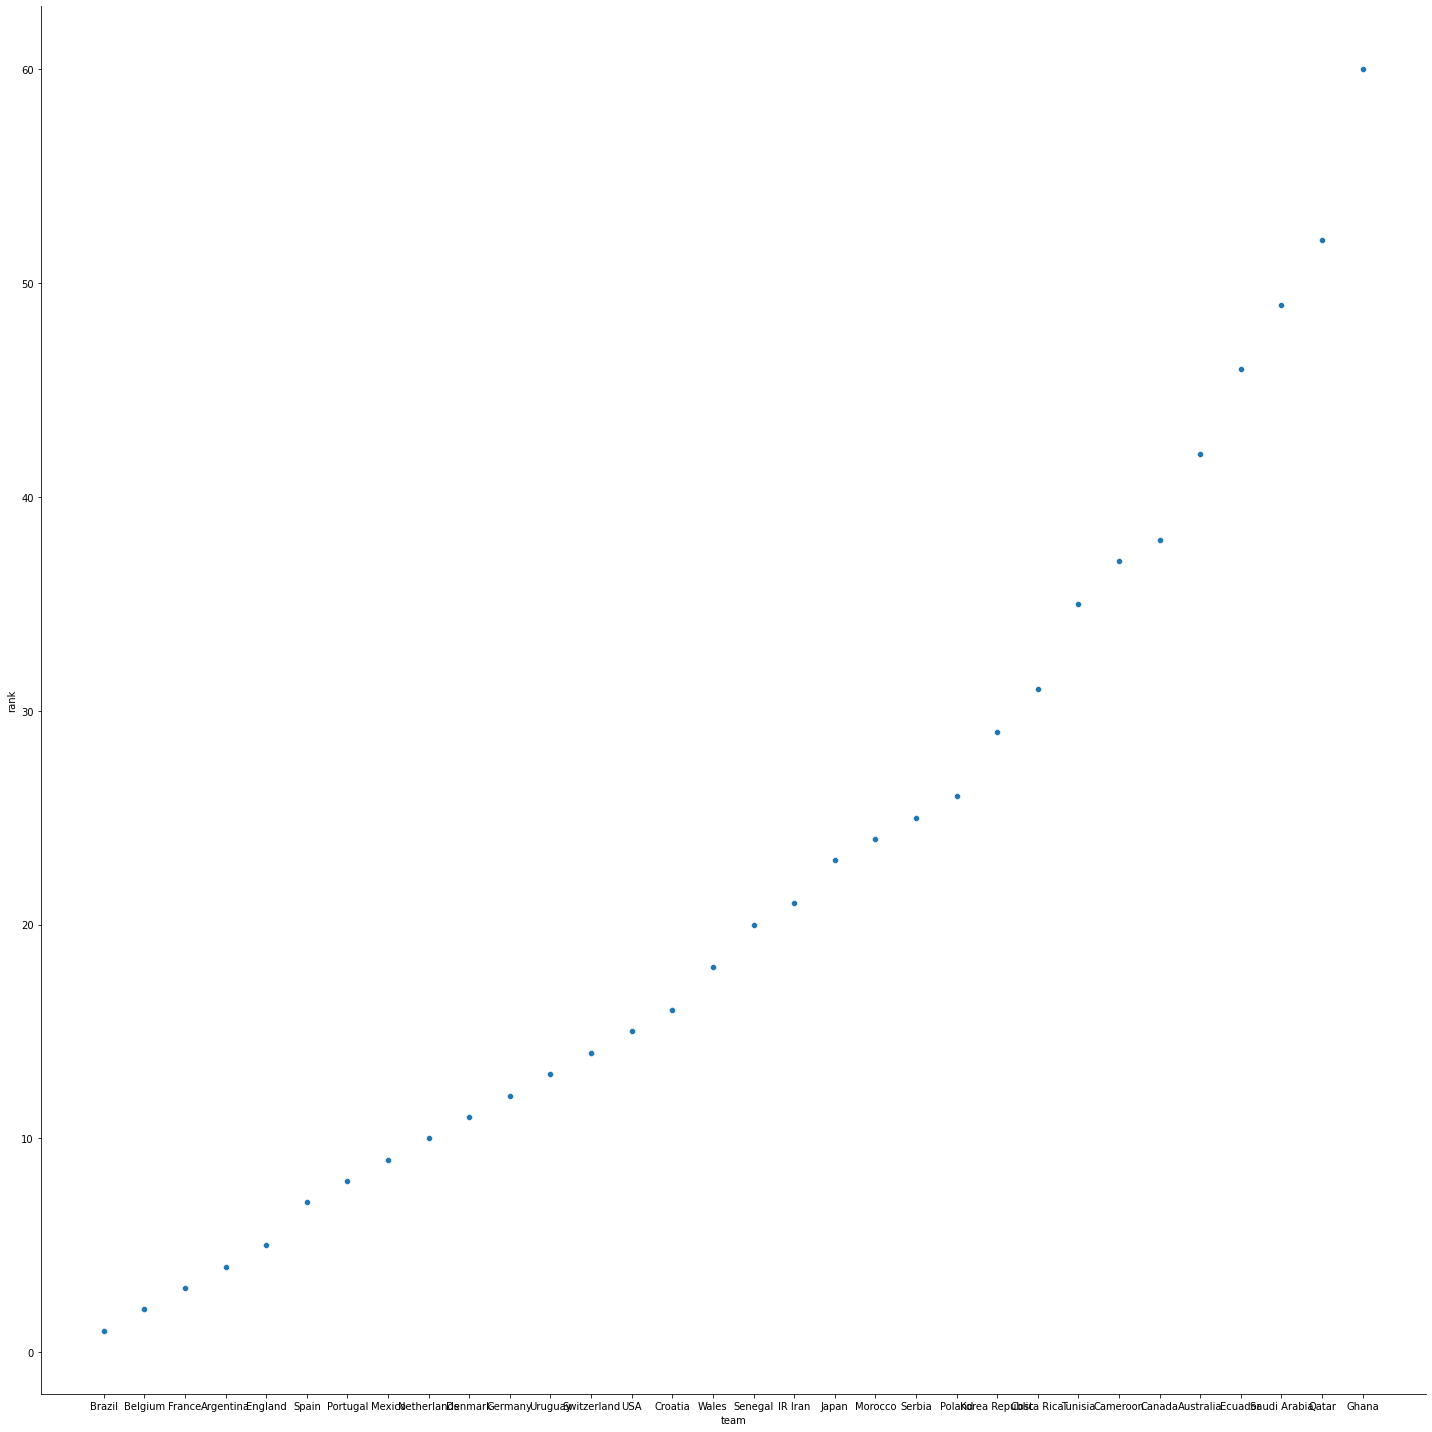

In [39]:
best_teams = fifa_rank.sort_values('date', ascending=False).groupby('team').first().sort_values('rank')
best_teams['rank'].reset_index().head(n=10)
best_teams
sns.relplot(x='team', y="rank", data=best_teams, height=20)

In [22]:
wc_match_only = data_wc[(data_wc.home_team.isin(world_cup_teams)) & (data_wc.away_team.isin(world_cup_teams))]
wc_match_only = wc_match_only[wc_match_only.home_team_result != 'Draw']
wc_match_only['team_winner'] = np.where(wc_match_only.home_team_result == 'Win', wc_match_only.home_team, wc_match_only.away_team)
wc_match_only[['home_team', 'away_team', 'home_team_result', 'team_winner']]

,home_team,away_team,home_team_result,team_winner
20449,France,Croatia,Win,France
20503,Korea Republic,Costa Rica,Win,Korea Republic
20504,Mexico,Uruguay,Lose,Uruguay
20508,USA,Brazil,Lose,Brazil
20514,England,Spain,Lose,Spain
...,...,...,...,...
23867,Switzerland,Portugal,Win,Switzerland
23885,France,Croatia,Lose,Croatia
23908,Netherlands,Wales,Win,Netherlands
23909,Poland,Belgium,Lose,Belgium


Classement des équipes avec le plus de victoires face aux équipes participant à la Coupe du monde

In [49]:
Top5 = wc_match_only['team_winner'].value_counts().head(n=10)

Top5


Argentina      13
Brazil         13
Mexico         13
USA            13
England        12
Belgium        11
France         11
Japan          10
Netherlands    10
Portugal        9
Name: team_winner, dtype: int64

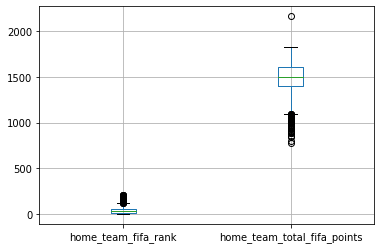

In [18]:
data_wc.boxplot(column=['home_team_fifa_rank', 'home_team_total_fifa_points'])

In [19]:
data_wc.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1047.000000,994.000000,1038.000000,1050.000000,1058.000000,985.000000,997.000000,1009.000000
mean,40.922330,49.563916,1482.772654,1443.500000,1.669094,1.054207,78.683859,77.598592,77.516281,78.451143,78.466446,76.388832,77.193380,77.363231
std,38.993725,42.438314,176.610899,186.943814,1.703452,1.313082,6.762875,7.202078,5.105626,6.054204,5.384228,5.330947,6.091557,5.712073
min,1.000000,1.000000,782.000000,791.000000,0.000000,0.000000,52.000000,52.000000,63.000000,59.700000,58.800000,60.000000,60.300000,60.000000
25%,13.000000,16.000000,1402.000000,1340.000000,0.000000,0.000000,74.000000,73.000000,73.800000,74.300000,75.200000,72.800000,72.700000,74.000000
50%,29.000000,38.000000,1501.000000,1463.000000,1.000000,1.000000,79.000000,77.000000,76.800000,77.700000,78.200000,76.000000,77.000000,77.500000
75%,56.000000,70.000000,1607.000000,1574.250000,2.000000,2.000000,84.000000,83.000000,81.200000,83.600000,83.000000,79.800000,82.300000,81.200000
max,211.000000,210.000000,2164.000000,2036.000000,14.000000,11.000000,91.000000,91.000000,87.800000,90.300000,88.800000,87.800000,90.300000,88.800000
